In [1]:
!activate yolo


(yolo) C:\Users\ihrishi\Desktop\examples\Yolo-digit-detector>conda.bat activate yolo 


In [41]:
import numpy as np

In [2]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

C:\Users\ihrishi\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ihrishi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\ihrishi\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
Using TensorFlow backend.


In [3]:
from yolo.frontend import create_yolo

# 1. create yolo instance
yolo_detector = create_yolo("ResNet50", ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], 416)

W0811 12:05:58.730464 18684 deprecation_wrapper.py:119] From C:\Users\ihrishi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:68: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0811 12:05:58.753713 18684 deprecation_wrapper.py:119] From C:\Users\ihrishi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:504: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0811 12:05:58.765215 18684 deprecation_wrapper.py:119] From C:\Users\ihrishi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3828: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0811 12:05:58.802127 18684 deprecation_wrapper.py:119] From C:\Users\ihrishi\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:166: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0811 12:05:58.803097 18684 deprecation_wrapper.

94658560/94653016 [==============================] - 2371s 25us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 416, 416, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 208, 208, 64) 9472        input_1[0][0]                    
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 208, 208, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 208, 208, 64) 0           bn_conv1[0][0]                   
________________________________________

In [4]:
# 2. load pretrained weighted file
# Pretrained weight file is at https://drive.google.com/drive/folders/1Lg3eAPC39G9GwVTCH3XzF73Eok-N-dER

DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "weights.h5")
yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in C:\Users\ihrishi\Desktop\examples\Yolo-digit-detector\weights.h5


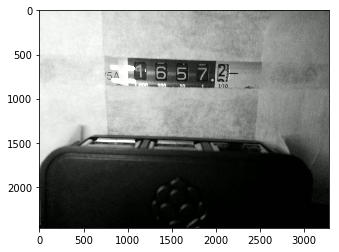

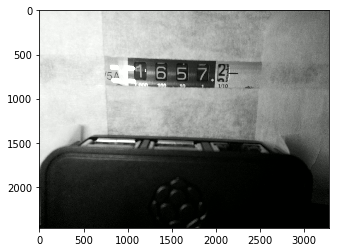

In [8]:

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "a.jpg"), os.path.join(DEFAULT_IMAGE_FOLDER, "b.jpg")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

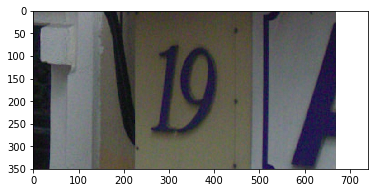

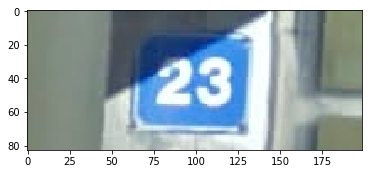

In [5]:
# 3. Load images

import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

0-boxes are detected.


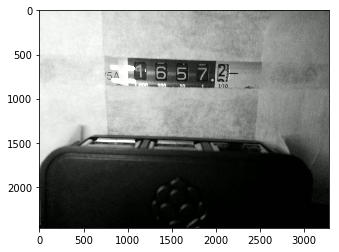

0-boxes are detected.


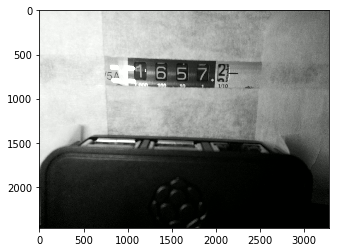

In [9]:
THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()

2-boxes are detected.


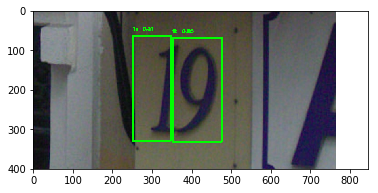

2-boxes are detected.


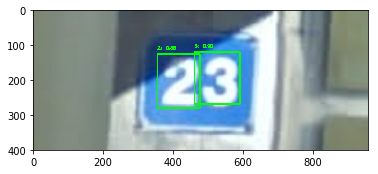

In [9]:
# 4. Predict digit region

THRESHOLD = 0.3
for img in imgs:
    boxes, probs = yolo_detector.predict(img, THRESHOLD)

    # 4. save detection result
    image = draw_scaled_boxes(img,
                              boxes,
                              probs,
                              ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

    print("{}-boxes are detected.".format(len(boxes)))
    plt.imshow(image)
    plt.show()


In [91]:
demo=cv2.imread(r"C:\Users\ihrishi\Pictures\demono.PNG")

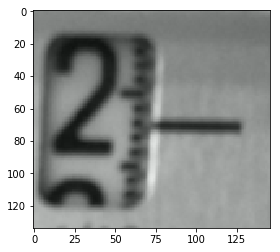

In [92]:
plt.imshow(demo)
plt.show()

In [93]:
edges = cv2.Canny(img,80,120)

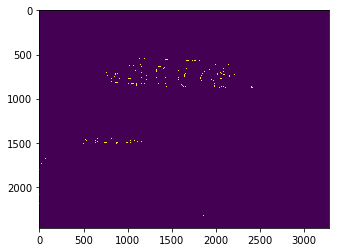

In [94]:
plt.imshow(edges)
plt.show()

In [95]:
gray = cv2.cvtColor(demo, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)

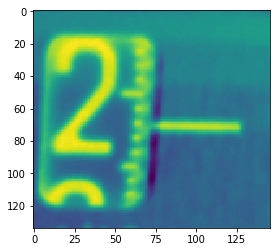

In [96]:
plt.imshow(gray)
plt.show()

In [97]:
yellow=np.copy(gray)

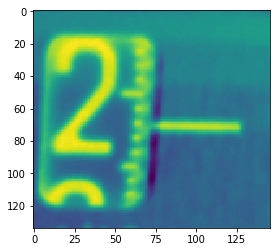

In [98]:
plt.imshow(gray)
plt.show()

In [99]:
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)

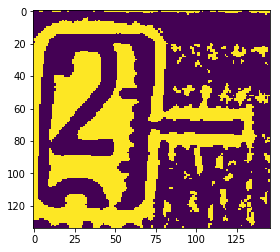

In [100]:
plt.imshow(bw)
plt.show()

In [101]:
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 5, -2)

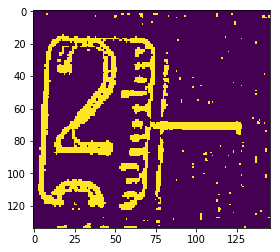

In [115]:
plt.imshow(bw)
plt.show()

In [116]:
final=np.copy(bw)

In [42]:
horizontal = np.copy(bw)
vertical = np.copy(bw)

In [45]:
# Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30
# Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (horizontal_size, 1))
# Apply morphology operations
horizontal = cv2.erode(horizontal, horizontalStructure)
horizontal = cv2.dilate(horizontal, horizontalStructure)

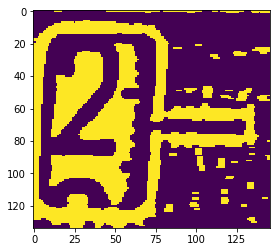

In [46]:
plt.imshow(horizontal)
plt.show()

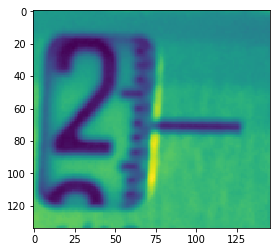

In [47]:
plt.imshow(gray)
plt.show()

In [112]:
img = cv2.imread(r"C:\Users\ihrishi\Pictures\demono.PNG")

In [113]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 75, 150)

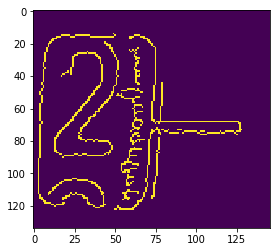

In [114]:
plt.imshow(edges)
plt.show()

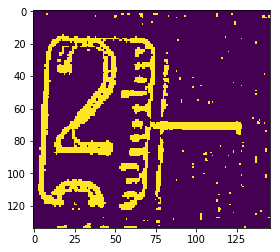

In [117]:
plt.imshow(final)
plt.show()

In [134]:
gray = cv2.bitwise_not(final)
bw = cv2.adaptiveThreshold(final, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 3, -2)

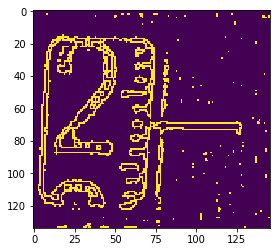

In [135]:
plt.imshow(bw)
plt.show()

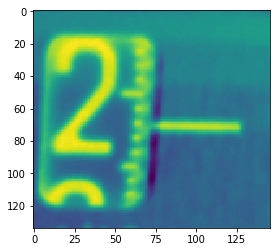

In [138]:
plt.imshow(yellow)
plt.show()

## demono1

In [150]:
img = cv2.imread(r"C:\Users\ihrishi\Pictures\demono1.PNG")

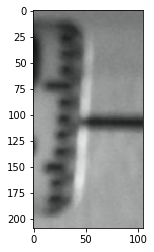

In [151]:
plt.imshow(img)
plt.show()